In [47]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
from scipy.optimize import root

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)
#notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

# data set when at office 
#filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
# data set when at home

In [48]:
cap = 0.211

Ms = 32
F = 9.649e4
R = 8.3145
T = 298
ar = 0.960
I = cap*0.2#1.7
nu = 0.114

#f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
#f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
#f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

EL0 = 1.95
EM0 = 2
EH0 = 2.4

ih0 = 5
im0 = 5
il0 = 5

In [49]:
S8_initial = 0.382
V_initial = 2.4

def S1_func(S2):
    return np.exp( (F/(R*T))*(EL0 - V_initial) )*f_l*np.sqrt(S2)

def S2_func(S4):
    return np.exp( (F/(R*T))*(EM0 - V_initial))*f_m*np.sqrt(S4)

def S4_root(S4):
    S2 = S2_func(S4)
    EH = EH0 + (R*T/F)*np.log(f_h*(S8_initial**(1/4))/np.sqrt(S4))
    eta_H = V_initial - EH
    iH = -2*ar*ih0*np.sinh((F/(2*R*T))*eta_H)
    return I + iH

In [50]:
S4 = root(S4_root, 10e-40)
S4_initial = S4['x'][0]
print(S4_initial)

1.699066644945854


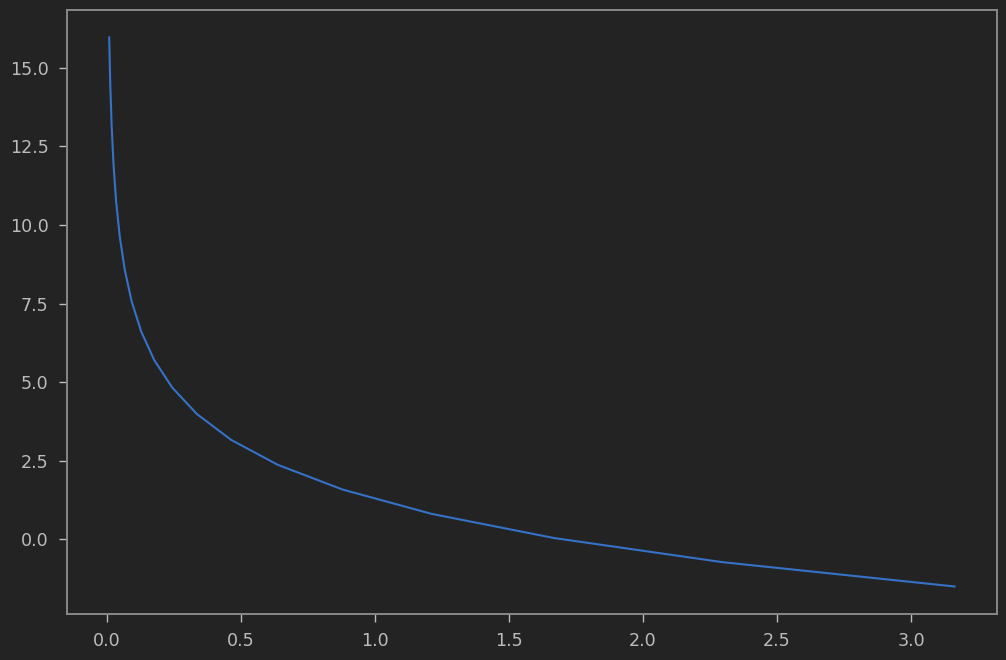

In [51]:
x = 10**np.linspace(-2,0.5,19)
plt.plot(x,S4_root(x))

In [54]:
EM0_list = np.linspace(1.5,2.2,10)
for EM0 in EM0_list:
    EL0_list = np.linspace(1.5,EM0,10)
    for EL0 in EL0_list:
        S8_initial = 0.382
        V_initial = 2.4

        def S1_func(S2):
            return np.exp( (F/(R*T))*(EL0 - V_initial) + f_l)*np.sqrt(S2)

        def S2_func(S4):
            return np.exp( (F/(R*T))*(EM0 - V_initial) + f_m)*np.sqrt(S4)

        def S4_root(S4):
            S2 = S2_func(S4)
            EH = EH0 + (R*T/F)*np.log(f_h*(S8_initial**(1/4))/np.sqrt(S4))
            eta_H = V_initial - EH
            iH = -2*ar*ih0*np.sinh((F/(2*R*T))*eta_H)
            return I + iH
        
        S4 = root(S4_root, 10e-40)
        S4_initial = S4['x'][0]
        print(EM0)
        print(EL0)
        print(S4_initial)
        print('\n')

1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5
1.5
1.699066644945854


1.5777777777777777
1.5
1.699066644945854


1.5777777777777777
1.508641975308642
1.699066644945854


1.5777777777777777
1.517283950617284
1.699066644945854


1.5777777777777777
1.525925925925926
1.699066644945854


1.5777777777777777
1.5345679012345679
1.699066644945854


1.5777777777777777
1.5432098765432098
1.699066644945854


1.5777777777777777
1.5518518518518518
1.699066644945854


1.5777777777777777
1.5604938271604938
1.699066644945854


1.5777777777777777
1.5691358024691358
1.699066644945854


1.5777777777777777
1.5777777777777777
1.699066644945854


1.6555555555555557
1.5
1.699066644945854


1.6555555555555557
1.517283950617284
1.699066644945854


1.6555555555555557
1.5345679012345679
1.699066644945854




In [25]:
Sp_initial = 1e-4

S2_initial = S2_func(S4_initial)
S1_initial = S1_func(S2_initial)

In [26]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_4()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": .0422,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        "Exchange current density L [A.m-2]": il0,
        "Exchange current density M [A.m-2]": im0,
        "Exchange current density H [A.m-2]": ih0,
        "Active reaction area per cell [m2]":ar,
        #"S saturation mass [g]": sat,
        'gamma': 0,#10e40,
        'kappa': 0,#10e12,
        'Shuttle rate coefficient during charge [s-1]': 0,
        'Shuttle rate coefficient during discharge [s-1]': 0,
        #'Precipitation rate [s-1]': kp
        
        }
)

sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-5,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 4000#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

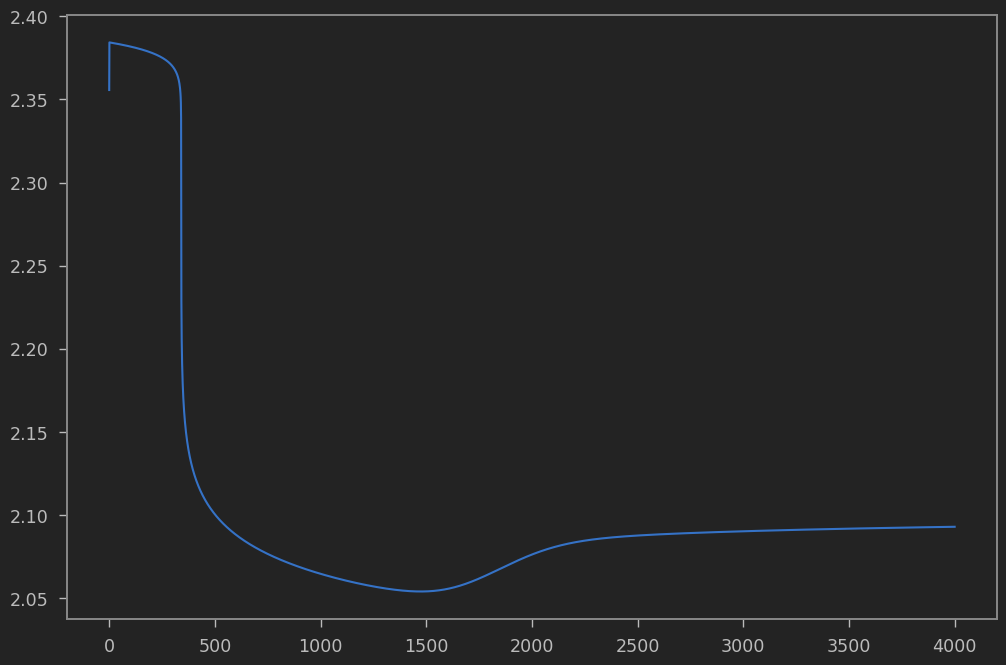

In [27]:
plt.plot(sim.solution.t,sim.solution["Terminal voltage [V]"].entries)

In [68]:
def negativity_check(sim):
    S8_end = sim.solution['S8 [g]'].entries[-1]
    S4_end = sim.solution['S4 [g]'].entries[-1]
    S2_end = sim.solution['S2 [g]'].entries[-1]
    S1_end = sim.solution['S [g]'].entries[-1]
    Sp_end = sim.solution['Precipitated Sulfur [g]'].entries[-1]
    if S8_end < 0 or S4_end < 0 or S2_end < 0 or S1_end < 0 or Sp_end < 0:
        print('Negative Species Values!')
        print(S8_end)
        print(S4_end)
        print(S2_end)
        print(S1_end)
        print(Sp_end)
        return True
    else:
        return False
    
def time_check(sim):
    time = 18500#24800#int(10 * cap*3600/I)# 3000#3240
    if sim.solution.t[-1] > time:
        print("Time's up!")
        return True
    else:
        return False

def voltage_check(sim):
    if sim.solution['Terminal voltage [V]'].entries[-1] < 1.55:
        print('Low Voltage!')
        return True
    else:
        return False

condition = True 
break_condition = True
print('\n\n\n\n\n Trying 100 \n\n\n\n\n')
while condition and break_condition:
    try:
        if negativity_check(sim) or time_check(sim) or voltage_check(sim):
            break_condition = False
        else:
            sim.step(100)
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 50 \n\n\n\n\n')
while condition and break_condition:
    try:
        if negativity_check(sim) or time_check(sim) or voltage_check(sim):
            break_condition = False
        else:
            sim.step(50)
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 10 \n\n\n\n\n')
while condition and break_condition:
    try:
        if negativity_check(sim) or time_check(sim) or voltage_check(sim):
            break_condition = False
        else:
            sim.step(10)
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 1 \n\n\n\n\n')
while condition and break_condition:
    try:
        if negativity_check(sim) or time_check(sim) or voltage_check(sim):
            break_condition = False
        else:
            sim.step(1)
    except:
        condition = False






 Trying 100 





Time's up!





 Trying 50 










 Trying 10 










 Trying 1 







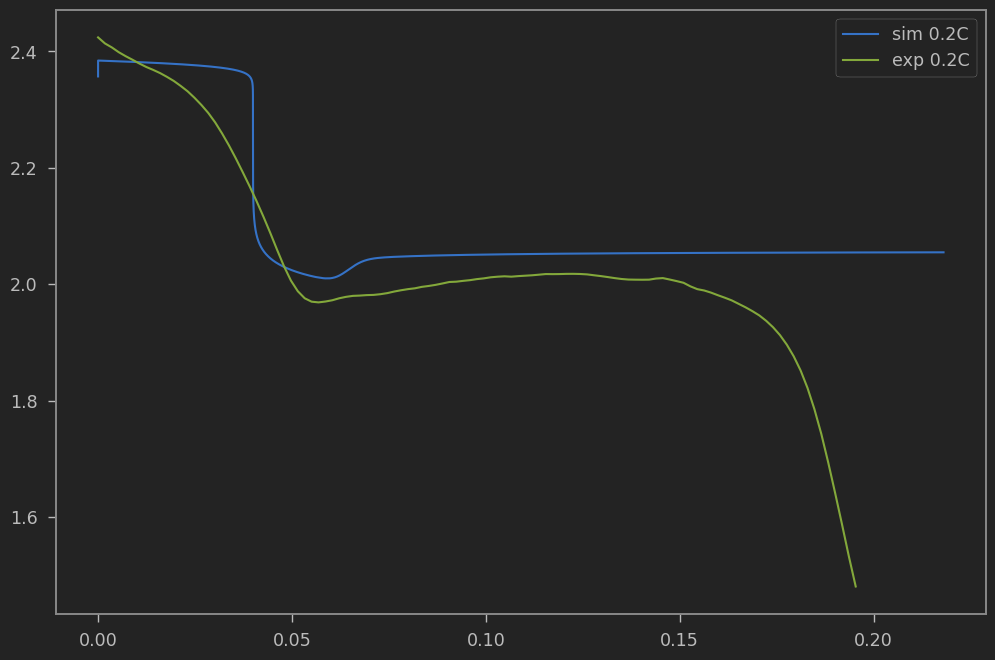

In [69]:
capacity = 0.0422*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
#filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])

plt.legend(["sim 0.2C","exp 0.2C" ])